<a href="https://colab.research.google.com/github/huseynovnebi/huseynovnebi-InsurancePremium_Prediction/blob/main/InsurancePremium_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from scipy.stats import probplot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/insurance.csv')
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [3]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
expenses,0


In [4]:
df.duplicated().sum()

1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include='number').columns
cat_cols, num_cols

(Index(['sex', 'smoker', 'region'], dtype='object'),
 Index(['age', 'bmi', 'children', 'expenses'], dtype='object'))

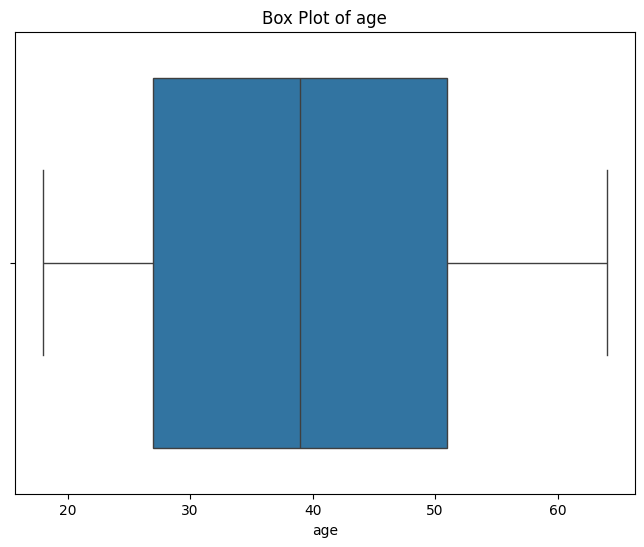

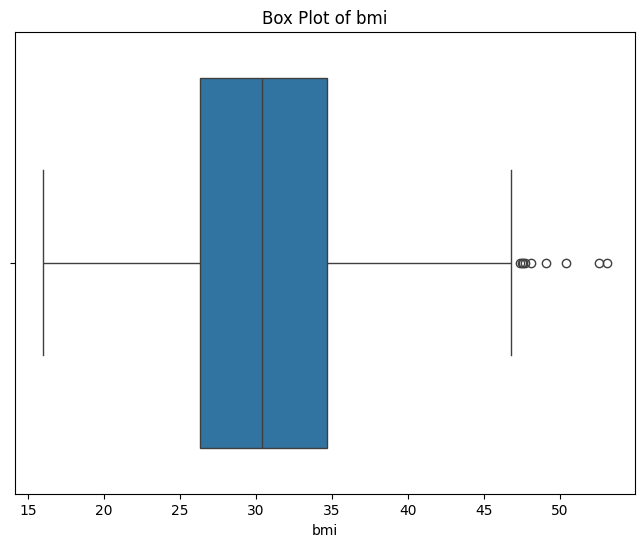

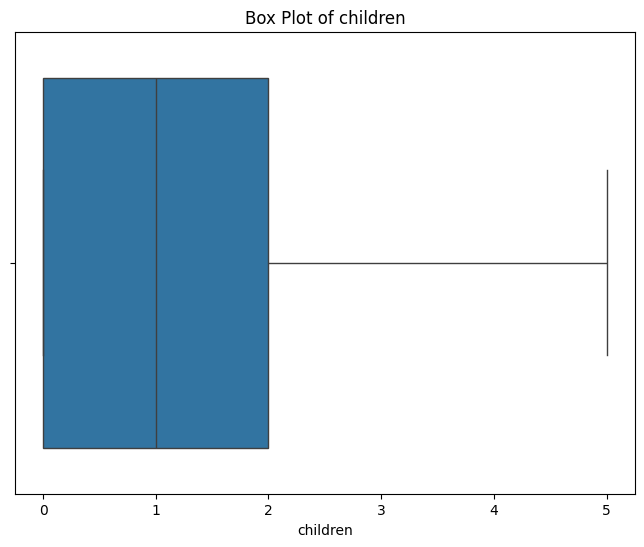

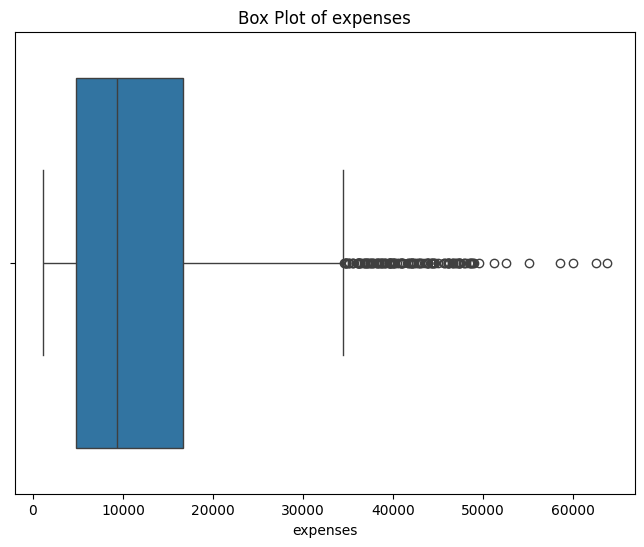

In [7]:
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

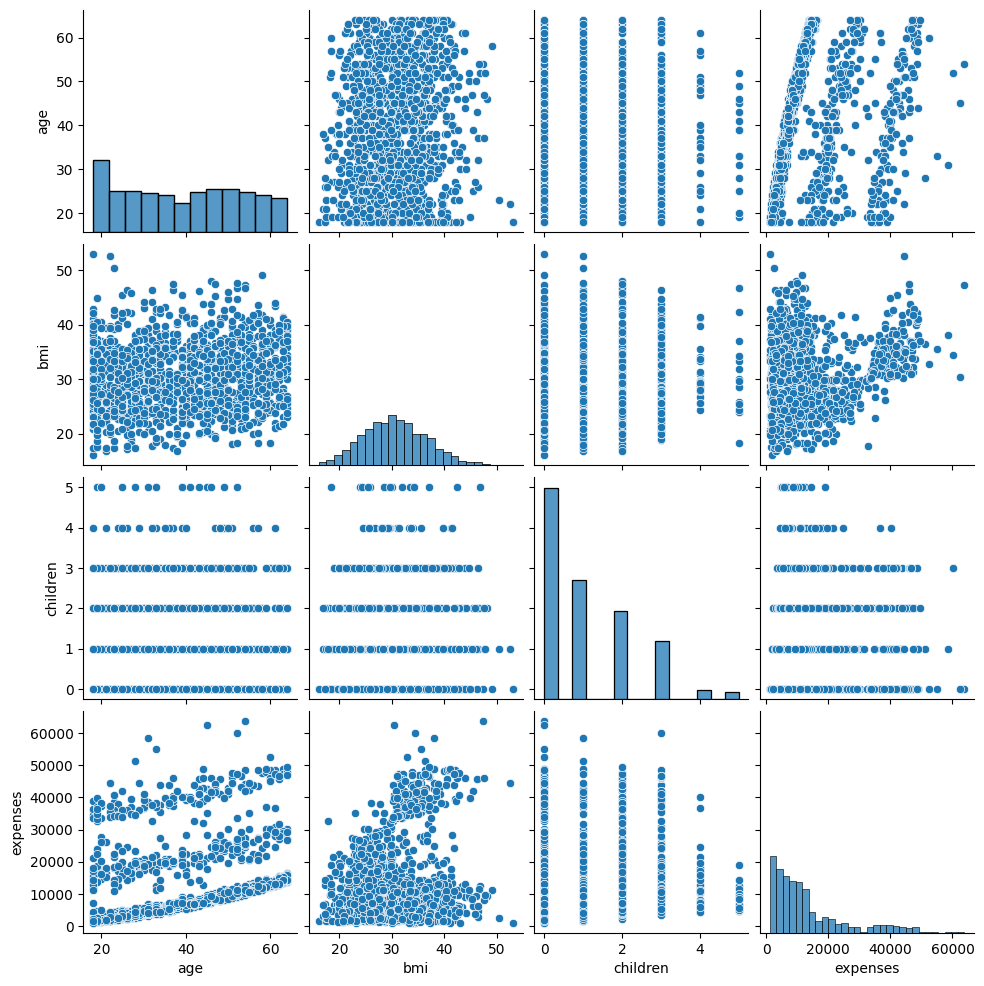

In [8]:
sns.pairplot(df)

<Axes: >

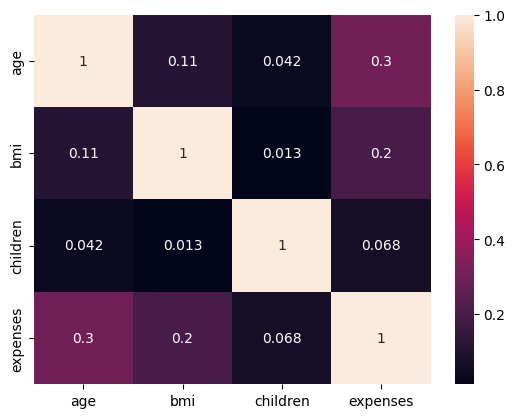

In [9]:
sns.heatmap(df[num_cols].corr(), annot=True)

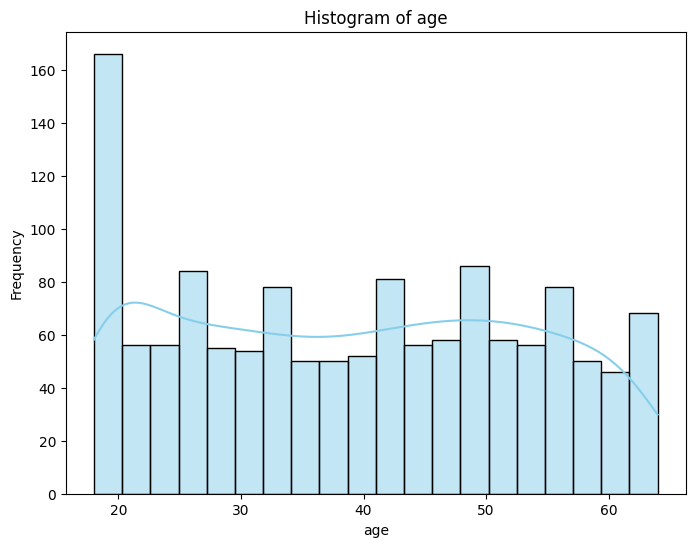

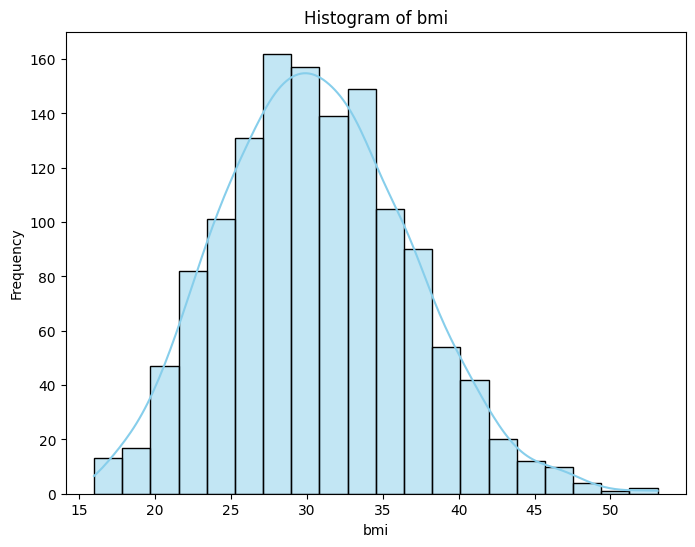

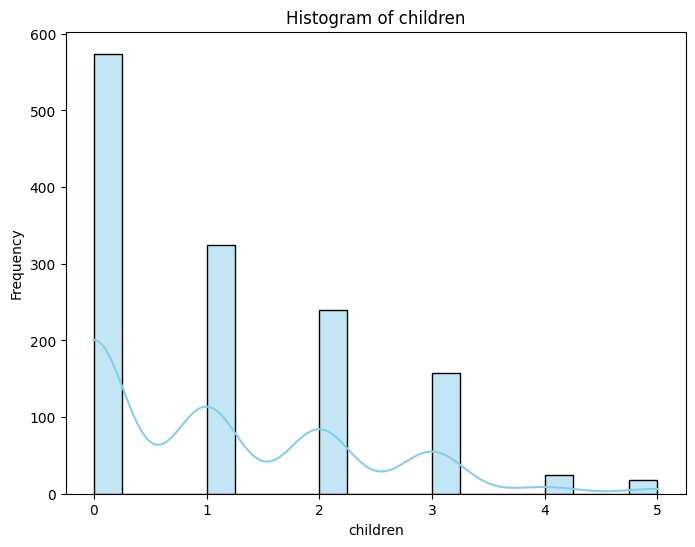

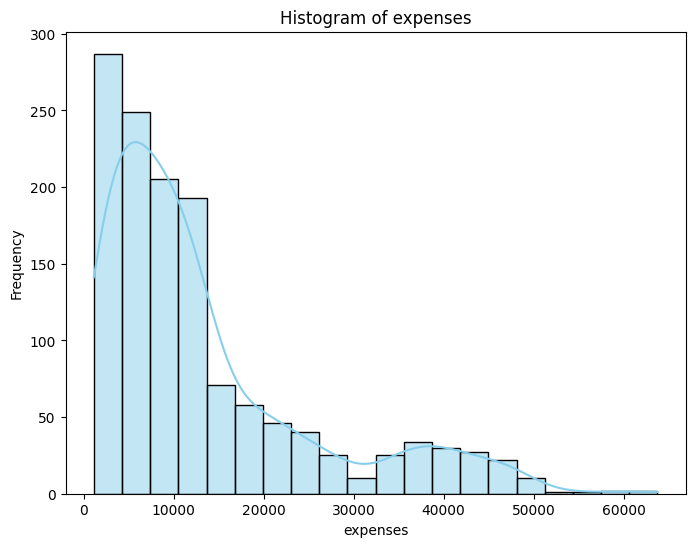

In [10]:
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [11]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1  # Interquartile range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_df = df[(df['bmi'] >= lower_bound) & (df['bmi'] <= upper_bound)]

In [12]:
df.region.value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [13]:
encoder = LabelEncoder()
filtered_df['sex'] = encoder.fit_transform(filtered_df['sex'])
filtered_df['smoker'] = encoder.fit_transform(filtered_df['smoker'])
filtered_df['region'] = encoder.fit_transform(filtered_df['region'])
filtered_df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


In [14]:
x = filtered_df.drop('expenses', axis=1)
y = filtered_df['expenses']

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(x_train)
X_test_poly = poly.transform(x_test)


model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [17]:
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

In [18]:
print("Training Set Performance:")
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("R^2:", r2_score(y_train, y_train_pred))

print("\nTesting Set Performance:")
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("R^2:", r2_score(y_test, y_test_pred))

Training Set Performance:
MAE: 2776.482581184599
R^2: 0.8493181840935454

Testing Set Performance:
MAE: 2764.592847720932
R^2: 0.8544125671692074


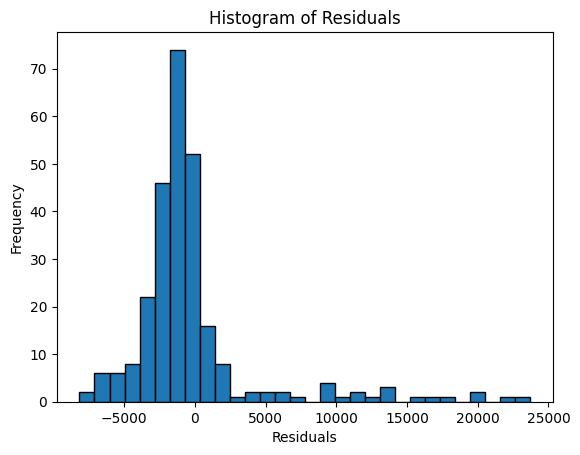

In [19]:
# Get residuals (actual values - predicted values)
residuals = y_test - y_test_pred

# Plot the histogram
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

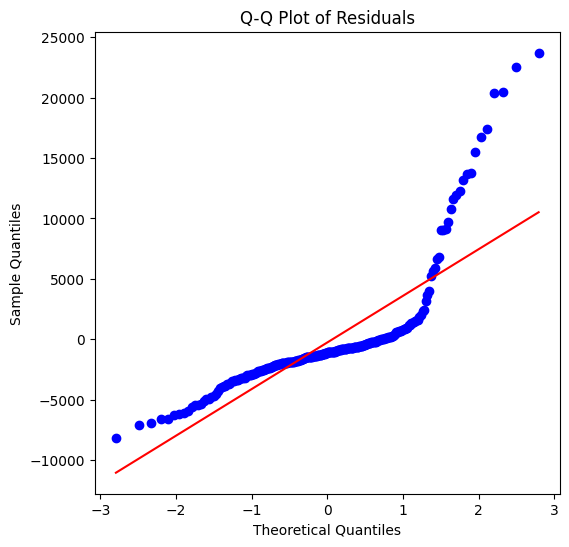

In [20]:
plt.figure(figsize=(6, 6))
probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

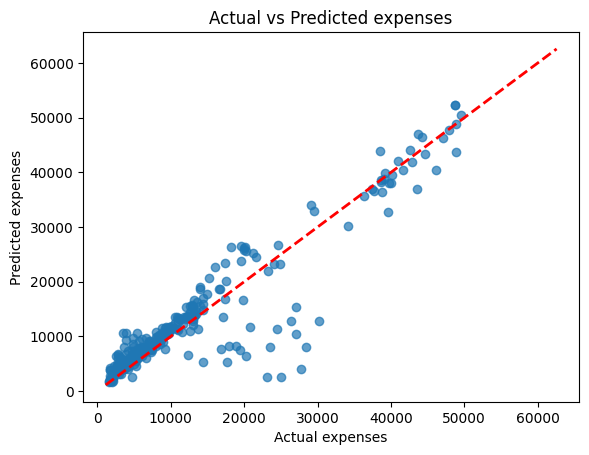

In [21]:
# Plot
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--r', linewidth=2)
plt.xlabel("Actual expenses")
plt.ylabel("Predicted expenses")
plt.title("Actual vs Predicted expenses")
plt.show()

In [74]:
rf_regressor = RandomForestRegressor(n_estimators=100,min_samples_split = 5, min_samples_leaf = 2,max_leaf_nodes=11,random_state=42,n_jobs=-1)
rf_regressor.fit(x_train, y_train)
y_pred = rf_regressor.predict(x_test)
y_pred_train = rf_regressor.predict(x_train)

In [75]:
mse = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
msetrain = mean_absolute_error(y_train, y_pred_train)
r2train = r2_score(y_train, y_pred_train)

print("Train Set Performance:")
print(f"mean_absolute_error: {msetrain:.2f}")
print(f"R^2 Score: {r2train:.2f}")
print("--------------------------------")
print("Test Set Performance:")
print(f"mean_absolute_error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Train Set Performance:
mean_absolute_error: 2501.13
R^2 Score: 0.87
--------------------------------
Test Set Performance:
mean_absolute_error: 2392.23
R^2 Score: 0.87


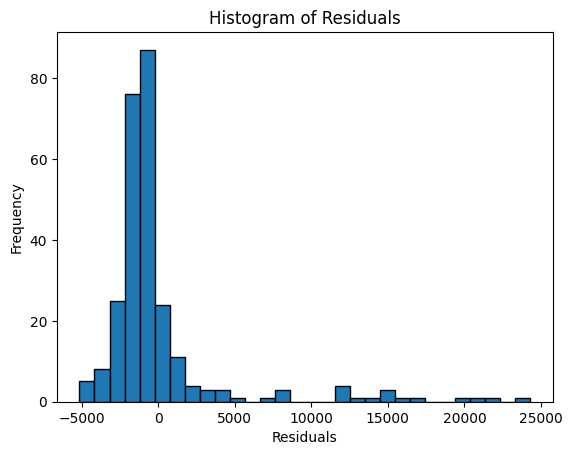

In [77]:
# Get residuals (actual values - predicted values)
residuals_rfg = y_test - y_pred

# Plot the histogram
plt.hist(residuals_rfg, bins=30, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

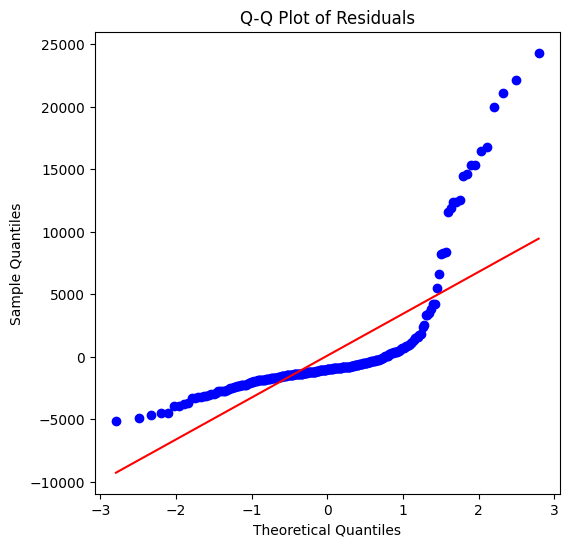

In [78]:
plt.figure(figsize=(6, 6))
probplot(residuals_rfg, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

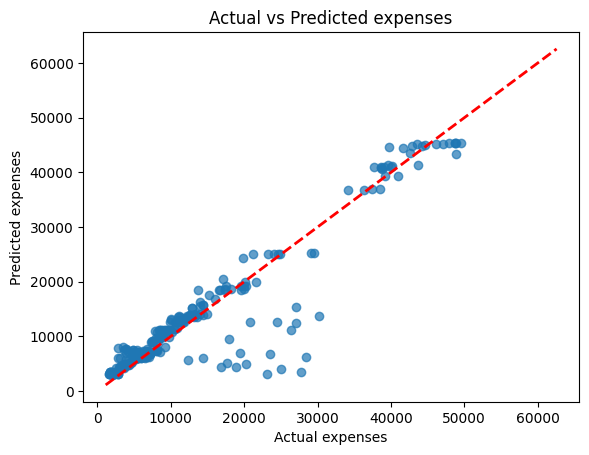

In [79]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--r', linewidth=2)
plt.xlabel("Actual expenses")
plt.ylabel("Predicted expenses")
plt.title("Actual vs Predicted expenses")
plt.show()

In [73]:
param_grid = {
    'n_estimators': [100, 200,300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1,2,4],
    'max_leaf_nodes': [8,11,15,25],
    'max_features': ['sqrt', 0.5, None,1.0]
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)


grid_search.fit(x_train, y_train)


print("Best Parameters found by GridSearchCV:")
print(grid_search.best_params_)

print("\nBest Cross-Validated Score (Negative MSE):")
print(grid_search.best_score_)


best_rf = grid_search.best_estimator_
print("\nBest RandomForestRegressor Parameter Values:")
for param, value in best_rf.get_params().items():
    print(f"{param}: {value}")


y_pred = best_rf.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"\nTest Set Mean Absolute Error (MAE): {mae:.2f}")

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best Parameters found by GridSearchCV:
{'max_depth': None, 'max_features': None, 'max_leaf_nodes': 25, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}

Best Cross-Validated Score (Negative MSE):
-20791923.087377064

Best RandomForestRegressor Parameter Values:
bootstrap: True
ccp_alpha: 0.0
criterion: squared_error
max_depth: None
max_features: None
max_leaf_nodes: 25
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 4
min_samples_split: 2
min_weight_fraction_leaf: 0.0
monotonic_cst: None
n_estimators: 300
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False

Test Set Mean Absolute Error (MAE): 2392.65
